In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


**TRAINING:**





In [2]:
import torch.optim as optim

**Loss function:**

In [3]:
#cross entropy - Loss Function provides us the measurement of how far the neural network is from the right output
loss_func=nn.CrossEntropyLoss()

**Optimizer:**

In [4]:
#Optimizer is responsible for changing the weight and other parameters to fit the data

#ADAM optimizer is used - Adaptive Momentum

#lr determines the magnitude of change done by the optimizer

optimizer=optim.Adam(net.parameters(), lr=0.001)

**Defining data passes through Epoches:**

In [6]:
#each full pass in dataset -> Epoch
#dataset is split into 10 batches

for epoch in range(3): # 3 epoches for 10 batches=30 iterations

  for data in trainset:
    X,y=data #features,targets

    net.zero_grad()  # new gradients have to be calculated at every pass

    output = net(X.view(-1,784)) #reshape from 28*28 to 1*784 and predicting

    loss=F.nll_loss(output,y)  #calculate loss value

    loss.backward() #Applying loss to parameters through backpropagation

    optimizer.step(); #optimize weights
  print(loss)

tensor(0.4232, grad_fn=<NllLossBackward0>)
tensor(0.0121, grad_fn=<NllLossBackward0>)
tensor(0.0299, grad_fn=<NllLossBackward0>)


**TESTING:**

In [10]:
correct,total=0,0 #correct keeps track of the correctly predicted images and total keeps track of the total number of test images passed to the model

with torch.no_grad():
  for data in testset:

    X,y=data

    output=net(X.view(-1,784)) #reshaping the test batch and predicting

    for predicted, actual in enumerate(output):

        if torch.argmax(actual)==y[predicted]:  # comparing predicted prob resulting label with actual label

          correct+=1
        total+=1  

print("Accuracy -> ", round(correct/total, 3))



Accuracy ->  0.963


**BTS with test img:**

In [12]:
import matplotlib.pyplot as plt

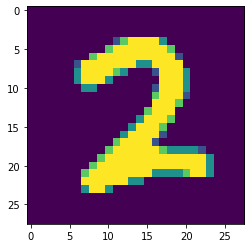

In [13]:
plt.imshow(X[5].view(28,28))
plt.show()

In [15]:
input=X[5]

reshaped=input.view(-1,784)

output=net(reshaped)

fpred=output[0]

print(fpred)  # precited prob values

print(torch.argmax(fpred))  # printing the highest prob value indicating the class(here it is 2)


tensor([-3.0306e+01, -2.1396e+01, -4.4107e-06, -1.9270e+01, -3.3292e+01,
        -3.0210e+01, -4.0419e+01, -1.2333e+01, -2.5358e+01, -3.3271e+01],
       grad_fn=<SelectBackward0>)
tensor(2)
